# 实验1 图像加载、显示

## 1-1：图像显示

实验要求：
1. 利用图像库的功能，实现从文件加载图像，并在窗口中进行显示的功能；
2. 利用常见的图像文件格式（`.jpg`； `.png`； `.bmp`； `.gif`）进行测试。

首先导入所需的库

In [1]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

指示图片文件路径

In [2]:
# 注意这里的图像只有静态图像，gif 图像需要另外处理
image_files = [
    "imgs/Lab1/Img1.png",
    "imgs/Lab1/Img2.jpg",
    "imgs/Lab1/Img3.bmp",
]

展示图片

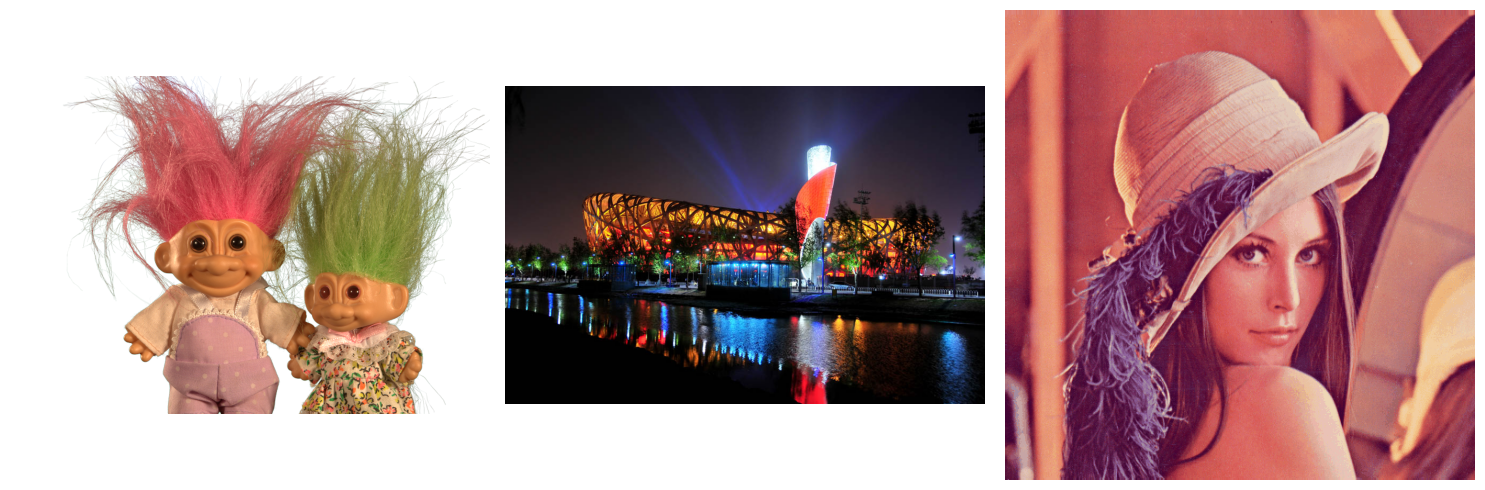

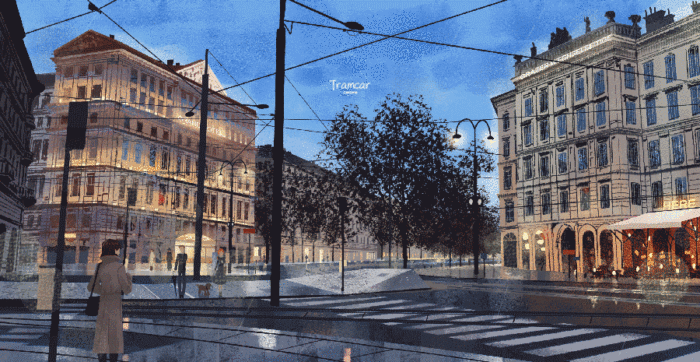

In [3]:
fig, axes = plt.subplots(1, len(image_files), figsize=(15, 5))

# 遍历每个图像文件并显示
for ax, file_path in zip(axes, image_files):
    img = mpimg.imread(file_path)
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

# 显示 GIF 图像
from IPython.display import display, Image
display(Image(filename="imgs/Lab1/Img4.gif"))

## 1-2：图像合成

实验要求：
1. 现有一张4通道透明图像a.png；
2. 从其中提取出alpha通道并显示；
3. 用alpha混合，为a.png替换一张新的背景（bg.png）。

首先读图

In [4]:
img = cv2.imread("imgs/Lab1/a.png", cv2.IMREAD_UNCHANGED)
bg = cv2.imread("imgs/Lab1/bg.png")

libpng warning: iCCP: known incorrect sRGB profile


提取alpha通道

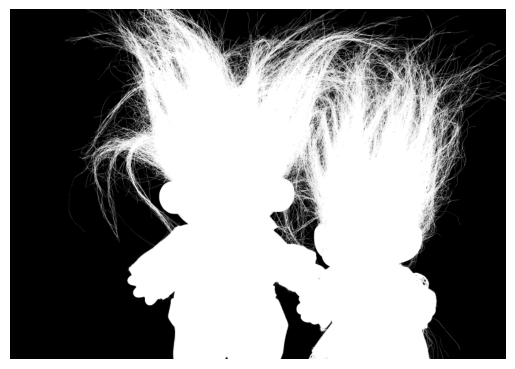

In [5]:
alpha = img[:, :, 3]
alpha = cv2.cvtColor(alpha, cv2.COLOR_GRAY2BGR)

# 显示alpha通道
plt.tight_layout()
plt.axis("off")
plt.imshow(alpha)
plt.show()

对齐大小

In [6]:
img = cv2.resize(img, (bg.shape[1], bg.shape[0]))

叠加到背景上

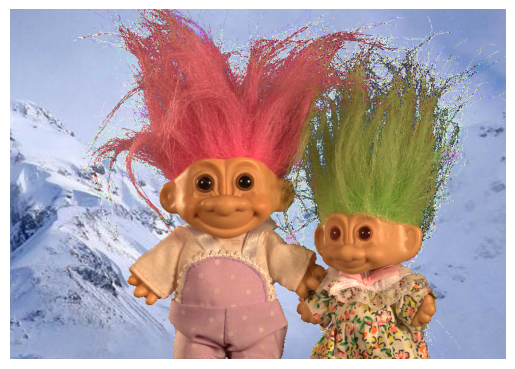

In [7]:
img_rgb = img[:, :, :3] # 拿出 RGB 通道
img_with_alpha = cv2.bitwise_and(img_rgb, alpha)

bg = cv2.bitwise_and(bg, cv2.bitwise_not(alpha))    # 取反
result = cv2.add(img_with_alpha, bg)

plt.tight_layout()
plt.axis("off")
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()